## Problem Statement:

The bank provides financial services/products such as savings accounts, current accounts, debit cards, etc. to its customers. In order to increase its overall revenue, the bank conducts various marketing campaigns for its financial products such as credit cards, term deposits, loans, etc. These campaigns are intended for the bank’s existing customers. However, the marketing campaigns need to be cost-efficient so that the bank not only increases their overall revenues but also the total profit. You need to apply your knowledge of EDA on the given dataset to analyse the patterns and provide inferences/solutions for the future marketing campaign.

The bank conducted a telemarketing campaign for one of its financial products ‘Term Deposits’ to help foster long-term relationships with existing customers. The dataset contains information about all the customers who were contacted during a particular year to open term deposit accounts.

#### Importing the libraries

In [2]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [3]:
#import the useful libraries.
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Read in the Data set.

In [4]:
inp0=pd.read_csv(r"C:\Users\HPPC\Desktop\Projects MY\Bank Dataset\bank_marketing.csv")
inp0.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


### Data Cleaning

In [5]:
inp0=pd.read_csv(r"C:\Users\HPPC\Desktop\Projects MY\Bank Dataset\bank_marketing.csv",skiprows=2)
inp0.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [6]:
# Checking footer
inp0.tail()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
45206,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45207,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45208,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45209,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no
45210,45211,37.0,120000,2971,married,"entrepreneur,secondary",yes,no,no,no,cellular,17,"nov, 2017",6.01666666666667 min,2,188,11,other,no


In [7]:
# Dropping customerid column
inp0.drop("customerid",axis=1,inplace=True)
inp0.head(3)

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


In [8]:
### Dividing jobedu into two separate columns job and edu.
inp0["job"]=inp0.jobedu.apply(lambda x : x.split(",")[0])
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown


In [9]:
inp0["education"]=inp0.jobedu.apply(lambda x : x.split(",")[1])
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [10]:
inp0.drop("jobedu",axis=1,inplace=True)
inp0.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [11]:
# Checking for the missing values in the columns
inp0.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [12]:
#print the shape of dataframe inp0
inp0.shape

(45211, 19)

In [13]:
#calculate the percentage of missing values in age column.
(20/45211)*100

0.0442370219636814

#### Drop the records with age missing.

In [14]:
#drop the records with age missing in inp0 and copy in inp1 dataframe.
inp1 = inp0[~inp0.age.isnull()].copy()

In [15]:
inp1.age.isnull().sum()

0

#### Handling missing values in month column

In [16]:
inp1.month.isnull().sum()

50

In [17]:
#print the percentage of each month in the data frame inp1.
inp1.month.value_counts(normalize=True)

may, 2017    0.304380
jul, 2017    0.152522
aug, 2017    0.138123
jun, 2017    0.118141
nov, 2017    0.087880
apr, 2017    0.064908
feb, 2017    0.058616
jan, 2017    0.031058
oct, 2017    0.016327
sep, 2017    0.012760
mar, 2017    0.010545
dec, 2017    0.004741
Name: month, dtype: float64

In [18]:
#find the mode of month in inp1
month_mode=inp1.month.mode()[0]
month_mode

'may, 2017'

In [19]:
# fill the missing values with mode value of month in inp1.
inp1.month.fillna(month_mode,inplace=True)

In [20]:
inp1.month.value_counts(normalize=True)

may, 2017    0.305149
jul, 2017    0.152353
aug, 2017    0.137970
jun, 2017    0.118010
nov, 2017    0.087783
apr, 2017    0.064836
feb, 2017    0.058551
jan, 2017    0.031024
oct, 2017    0.016309
sep, 2017    0.012746
mar, 2017    0.010533
dec, 2017    0.004735
Name: month, dtype: float64

In [21]:
#let's see the null values in the month column.
inp1.month.isnull().sum()

0

#### handling pdays column.

In [22]:
inp1.pdays.describe()

count    45191.000000
mean        40.181253
std        100.074099
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

-1 indicates the missing values. Missing value does not always be present as null

In [23]:
inp1.loc[inp1.pdays<0,"pdays"]=np.NaN

In [24]:
inp1.pdays.describe()

count    8252.000000
mean      224.523752
std       115.202715
min         1.000000
25%       133.000000
50%       194.500000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

#### This shows that missing values doesnot need to be always present as null.

#### Handling missing values in response column(Target Variable)

In [25]:
#count the missing values in response column in inp1.
inp1.response.isnull().sum()

30

In [26]:
#calculate the percentage of missing values in response column. 
(30/45191)*100

0.06638489964816004

In [27]:
inp1.shape

(45191, 19)

In [28]:
#drop the records with response missings in inp1.
inp1=inp1[~inp1.response.isnull()]

In [29]:
inp1.response.isnull().sum()

0

In [30]:
#calculate the missing values in each column of data frame: inp1.
inp1.isnull().sum()

age              0
salary           0
balance          0
marital          0
targeted         0
default          0
housing          0
loan             0
contact          0
day              0
month            0
duration         0
campaign         0
pdays        36915
previous         0
poutcome         0
response         0
job              0
education        0
dtype: int64

### Handling Outliers

#### Age Variable

In [31]:
inp1.age.describe()

count    45161.000000
mean        40.935763
std         10.618790
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

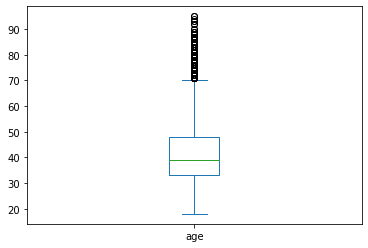

In [32]:
#plot the boxplot of age variable.
inp1.age.plot.box()
plt.show()

##### The age variable has outliers, but these can be treated as the normal values of age because any person can be over 70 or 80 years of age. Also, the 70-90 age group is sparsely populated and participate in opening the term deposit account, which is why these set of people fall out of the box plot but they are not outliers and can be considered as normal values.

#### Balance variable

In [33]:
inp1.balance.describe()

count     45161.000000
mean       1362.850690
std        3045.939589
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

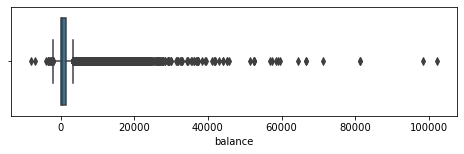

In [34]:
#plot the boxplot of balance variable.
plt.figure(figsize=[8,2])
sns.boxplot(inp1.balance)
plt.show()

In [35]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of balance variable
inp1.balance.quantile([0.5,0.7,0.9,0.95,0.99])

0.50      448.0
0.70     1126.0
0.90     3576.0
0.95     5769.0
0.99    13173.4
Name: balance, dtype: float64

#### Salary variable

In [36]:
inp1.salary.describe()

count     45161.000000
mean      57004.849317
std       32087.698810
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

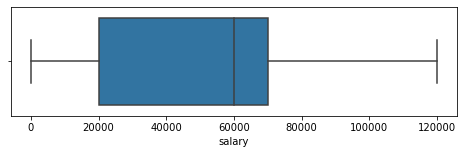

In [37]:
#plot the boxplot of salary variable.
plt.figure(figsize=[8,2])
sns.boxplot(inp1.salary)
plt.show()

##### No outliers found in salary variable as clear from the boxplot.

## Standardising values

In [38]:
#describe the duration variable of inp1
inp1.duration.describe()

count       45161
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

In [39]:
inp1.duration.head()

0    261 sec
1    151 sec
2     76 sec
3     92 sec
4    198 sec
Name: duration, dtype: object

In [41]:
#convert the duration variable into single unit i.e. minutes. and remove the sec or min prefix.
inp1["duration"]=inp1.duration.apply(lambda x: float(x.split()[0])/60 if x.find("sec")>0 else float(x.split()[0]))

## Univariate Analysis-Categorical Features

#### Marital status

In [42]:
#calculate the percentage of each marital status category. 
inp1.marital.value_counts(normalize=True)

married     0.601957
single      0.282943
divorced    0.115099
Name: marital, dtype: float64

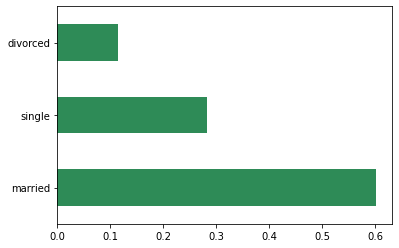

In [44]:
#plot the bar graph of percentage marital status categories
inp1.marital.value_counts(normalize=True).plot.barh(color='seagreen')
plt.show()

##### Married people have been contacted the most by the bank.

## Job

In [45]:
#calculate the percentage of each job status category.
inp1.job.value_counts(normalize=True)

blue-collar      0.215274
management       0.209273
technician       0.168043
admin.           0.114369
services         0.091849
retired          0.050087
self-employed    0.034853
entrepreneur     0.032860
unemployed       0.028830
housemaid        0.027413
student          0.020770
unknown          0.006377
Name: job, dtype: float64

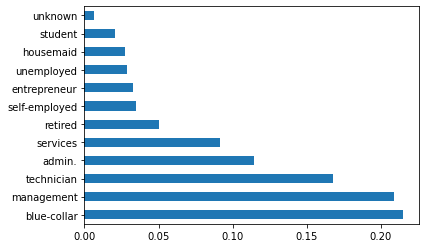

In [47]:
#plot the bar graph of percentage job categories
inp1.job.value_counts(normalize=True).plot.barh()
plt.show()

##### Blue-collar & management category have been contacted the most by the bank.

### Education

In [48]:
#calculate the percentage of each education category.
inp1.education.value_counts(normalize=True)

secondary    0.513275
tertiary     0.294192
primary      0.151436
unknown      0.041097
Name: education, dtype: float64

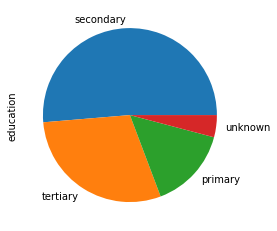

In [49]:
#plot the pie chart of education categories
inp1.education.value_counts(normalize=True).plot.pie()
plt.show()

##### The bank has primarily contacted those customers who have completed their secondary education.

#### poutcome

In [50]:
#calculate the percentage of each poutcome category.
inp1.poutcome.value_counts(normalize=True)

unknown    0.817520
failure    0.108368
other      0.040721
success    0.033392
Name: poutcome, dtype: float64

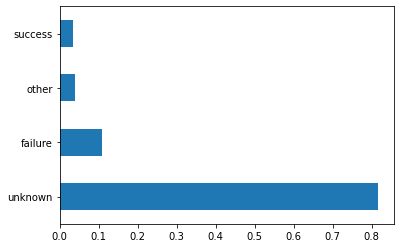

In [52]:
inp1.poutcome.value_counts(normalize=True).plot.barh()
plt.show()

##### For the majority of the customers, the previous campaign has not been conducted.

<AxesSubplot:>

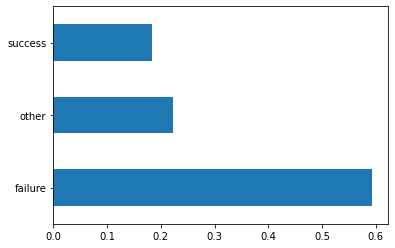

In [54]:
# Removing the unknown category and plotting bar graph again.
inp1[~(inp1.poutcome=="unknown")].poutcome.value_counts(normalize=True).plot.barh()

#### Response the target variable

In [56]:
#calculate the percentage of each response category.
inp1.response.value_counts(normalize=True)

no     0.882974
yes    0.117026
Name: response, dtype: float64

<AxesSubplot:ylabel='response'>

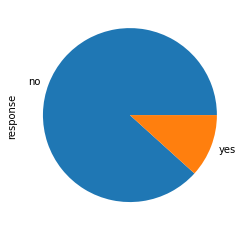

In [57]:
#plot the pie chart of response categories
inp1.response.value_counts(normalize=True).plot.pie()

##  Bivariate and Multivariate Analysis

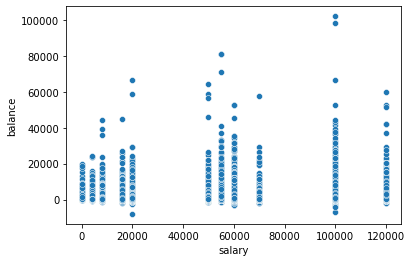

In [58]:
#plot the scatter plot of balance and salary variable in inp1
sns.scatterplot(x=inp1.salary,y=inp1.balance)
plt.show()

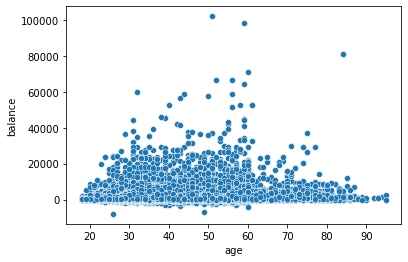

In [59]:
#plot the scatter plot of balance and age variable in inp1
sns.scatterplot(inp1.age,inp1.balance)
plt.show()

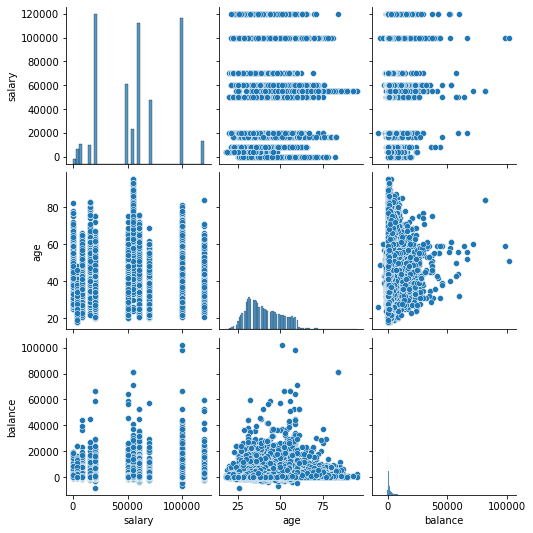

In [60]:
#plot the pair plot of salary, balance and age in inp1 dataframe.
sns.pairplot(data=inp1,vars=['salary','age','balance'])
plt.show()

#### Correlation heatmap

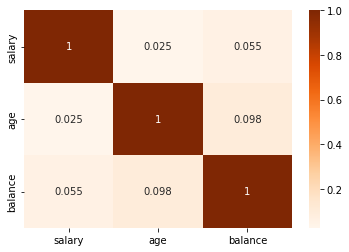

In [66]:
sns.heatmap(data=inp1[['salary','age','balance']].corr(),annot=True,cmap='Oranges')
plt.show()

#### Salary vs response

In [68]:
inp1.groupby("response")['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [69]:
inp1.groupby("response")['salary'].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

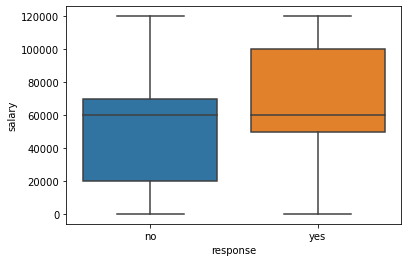

In [71]:
#plot the box plot of salary for yes & no responses.
sns.boxplot(x=inp1.response,y=inp1.salary)
plt.show()

#####  The interquartile range for customers who gave a positive response is on the higher salary side. This is actually true, because people who have higher salaries are more likely to invest in term deposits.

#### Balance vs response

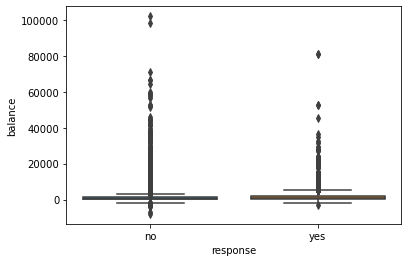

In [72]:
#plot the box plot of balance for yes & no responses.
sns.boxplot(inp1.response,inp1.balance)
plt.show()

In [73]:
inp1.groupby("response")["balance"].mean()

response
no     1304.292281
yes    1804.681362
Name: balance, dtype: float64

In [74]:
inp1.groupby("response")["balance"].median()

response
no     417.0
yes    733.0
Name: balance, dtype: float64

In [75]:
# 75th percentile
def p75(x):
    return np.quantile(x,0.75)

In [86]:
inp1.groupby("response")["balance"].aggregate(["mean","median",p75])

,mean,median,p75
response,,,
no,1304.292281,417.0,1345.0
yes,1804.681362,733.0,2159.0


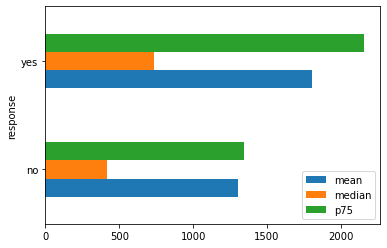

In [89]:
inp1.groupby("response")["balance"].aggregate(["mean","median",p75]).plot.barh()
plt.show()

In [90]:
#create response_flag of numerical data type where response "yes"= 1, "no"= 0
inp1["response_flag"]=np.where(inp1.response=='yes',1,0)

In [92]:
inp1["response_flag"].value_counts(normalize=True)

0    0.882974
1    0.117026
Name: response_flag, dtype: float64

#### Education vs response rate

In [95]:
inp1.groupby("education")["response_flag"].mean()

education
primary      0.086416
secondary    0.105608
tertiary     0.150083
unknown      0.135776
Name: response_flag, dtype: float64

##### The positive response of customers to opening a term deposit with the bank increases with the education level. From this, we can infer that the bank should contact people with higher education levels to effectively increase the positive response for opening a term deposit.

#### Marital vs response rate

In [96]:
inp1.groupby("marital")["response_flag"].mean()

marital
divorced    0.119469
married     0.101269
single      0.149554
Name: response_flag, dtype: float64

<AxesSubplot:ylabel='marital'>

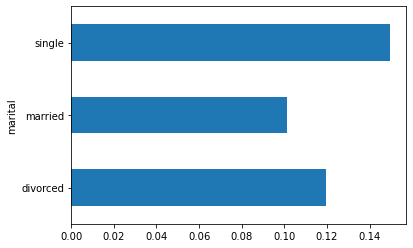

In [97]:
inp1.groupby("marital")["response_flag"].mean().plot.barh()

##### Based on marital status analysis, we can infer that single individuals have a higher positive response rate. This could be due to various reasons: One reason could be that compared with other categories of customers, single individuals have available income to deposit in long-term savings accounts (term deposit). Hence, the campaign should target single customers.

#### Loans vs response rate

<AxesSubplot:xlabel='loan'>

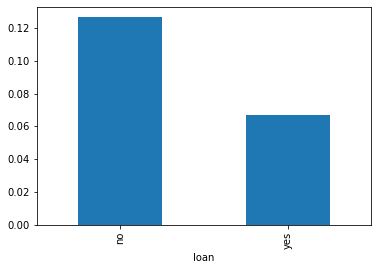

In [98]:
inp1.groupby("loan")["response_flag"].mean().plot.bar()

#### Housing loans vs response rate

<AxesSubplot:xlabel='housing'>

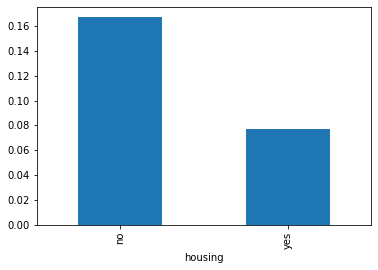

In [100]:
inp1.groupby("housing")["response_flag"].mean().plot.bar()

##### Another very interesting inference is that people who have not purchased any housing or personal loan are more likely to open a term deposit account with the bank. This is true, probably because people who have already availed loans may not have the necessary funds to invest in a term deposit.

#### Age vs response

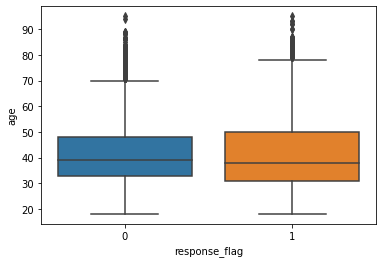

In [102]:
#plot the boxplot of age with response_flag
sns.boxplot(inp1["response_flag"],inp1.age)
plt.show()

#### Making buckets from age columns

In [104]:
inp1["age_group"]=pd.cut(inp1.age,bins=(0,30,40,50,60,999),labels=["<30","30-40","40-50","50-60","60+"])

In [105]:
inp1["age_group"].value_counts(normalize=True)

30-40    0.391090
40-50    0.248688
50-60    0.178406
<30      0.155555
60+      0.026262
Name: age_group, dtype: float64

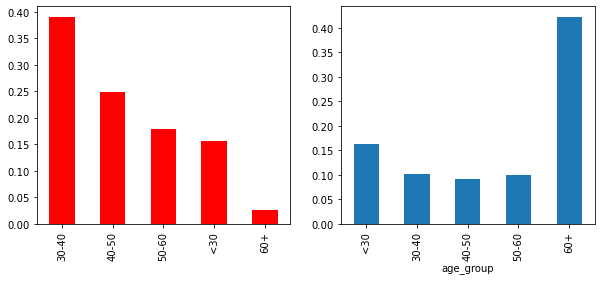

In [109]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
inp1["age_group"].value_counts(normalize=True).plot.bar(color='r')
plt.subplot(1,2,2)
inp1.groupby("age_group")["response_flag"].mean().plot.bar()
plt.show()

##### So, age group analysis showed that people in the age group of 60+ or <30 are more likely to respond positively. It may be true for older people, since they want to invest through more secure investment methods such as term deposits to have a secure old age.

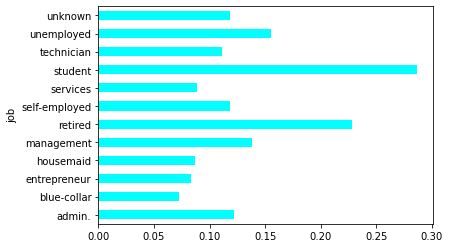

In [111]:
#plot the bar graph of job categories with response_flag mean value.
inp1.groupby("job")["response_flag"].mean().plot.barh(color="cyan")
plt.show()

#### Education vs marital vs response

In [112]:
#create heat map of education vs marital vs response_flag
res=pd.pivot_table(data=inp1,index="education",columns="marital",values="response_flag")
res

marital,divorced,married,single
education,,,
primary,0.138852,0.075601,0.106808
secondary,0.103559,0.094650,0.129271
tertiary,0.137415,0.129835,0.183737
unknown,0.142012,0.122519,0.162879


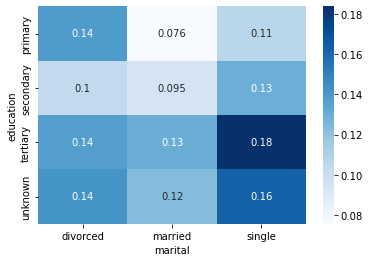

In [113]:
sns.heatmap(res,annot=True,cmap="Blues")
plt.show()

##### People who are married and who have completed just their primary education are least likely to give a positive response on term deposits. This can be explained by the fact that people educated only up to the primary level are not aware of the benefits of term investments.  Also, married individuals need money to fulfil their daily needs, and they require cash-on-hand to buy the daily essentials; hence, they won't prefer investing in term deposits.

#### Job vs marital vs response

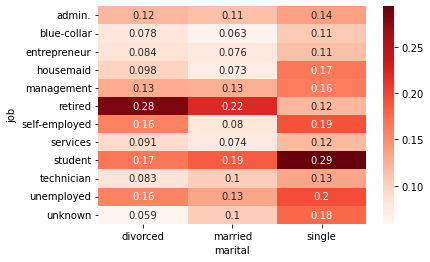

In [114]:
#create the heat map of Job vs marital vs response_flag.
res1=pd.pivot_table(data=inp1,index="job",columns="marital",values="response_flag")
sns.heatmap(res1,annot=True,cmap="Reds")
plt.show()

#### Education vs poutcome vs response

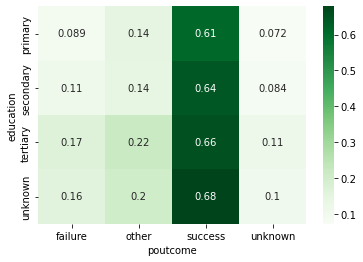

In [118]:
#create the heat map of education vs poutcome vs response_flag.
res2=pd.pivot_table(data=inp1,index="education",columns="poutcome",values="response_flag")
sns.heatmap(res2,annot=True,cmap="Greens")
plt.show()

##### The combinations of married with blue-collar, entrepreneur and housemaid are least likely to go for term deposits. The highest rate of positive response came from students with single marital status. The bank should, therefore, consider these aspects before taking any decision.

In [ ]:
---------------------------------END--------------------------------------------------------------------------------------------